In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Set some constants
img_size = 224  # Image size for ResNet input
batch_size = 32  # Batch size for training
num_classes = 5  # Number of classes

In [10]:
# Paths to dataset directories
train_dir = r"D:\augmented_images\traina"
test_dir = r"D:\augmented_images\testa"
validation_dir = r"D:\augmented_images\vala"

In [11]:
# Check if directories exist and print their contents
for directory in [train_dir, test_dir, validation_dir]:
    if os.path.exists(directory):
        print(f"Directory '{directory}' exists.")
        print(f"Subdirectories in '{directory}': {os.listdir(directory)}")
    else:
        print(f"Directory '{directory}' does not exist. Please check the path.")
        raise FileNotFoundError(f"Directory '{directory}' not found.")

Directory 'D:\augmented_images\traina' exists.
Subdirectories in 'D:\augmented_images\traina': ['0a', '1a', '2a', '3a', '4a']
Directory 'D:\augmented_images\testa' exists.
Subdirectories in 'D:\augmented_images\testa': ['0a', '1a', '2a', '3a', '4a']
Directory 'D:\augmented_images\vala' exists.
Subdirectories in 'D:\augmented_images\vala': ['0a', '1a', '2a', '3a', '4a']


In [12]:
# Create an ImageDataGenerator for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # For validation and testing, just rescale


In [13]:
# Load data from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'  # ResNet expects 3 channels (RGB)
)
validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False  # For testing, we don't need to shuffle
)

Found 31620 images belonging to 5 classes.
Found 8054 images belonging to 5 classes.
Found 16982 images belonging to 5 classes.


In [14]:
# Load the ResNet50 model, excluding the top fully connected layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 185s 2us/step


In [15]:
# Freeze the layers of ResNet50 to prevent updating them during training
for layer in resnet.layers:
    layer.trainable = False

In [16]:
# Build the full model
model = Sequential([
    resnet,  # Base model from ResNet50
    GlobalAveragePooling2D(),  # Global average pooling
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for 5 classes
])


In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



In [18]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [19]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[early_stopping]
)


C:\Users\C RISHI VARDHAN REDD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
989/989 ━━━━━━━━━━━━━━━━━━━━ 2599s 3s/step - accuracy: 0.2699 - loss: 1.5698 - val_accuracy: 0.3792 - val_loss: 1.4513
Epoch 2/25
989/989 ━━━━━━━━━━━━━━━━━━━━ 2376s 2s/step - accuracy: 0.2881 - loss: 1.5128 - val_accuracy: 0.3792 - val_loss: 1.4383
Epoch 3/25
989/989 ━━━━━━━━━━━━━━━━━━━━ 2244s 2s/step - accuracy: 0.2919 - loss: 1.5048 - val_accuracy: 0.3792 - val_loss: 1.4416
Epoch 4/25
989/989 ━━━━━━━━━━━━━━━━━━━━ 2337s 2s/step - accuracy: 0.2912 - loss: 1.5002 - val_accuracy: 0.3792 - val_loss: 1.4498
Epoch 5/25
989/989 ━━━━━━━━━━━━━━━━━━━━ 2347s 2s/step - accuracy: 0.2882 - loss: 1.5015 - val_accuracy: 0.3792 - val_loss: 1.4392
Epoch 6/25
989/989 ━━━━━━━━━━━━━━━━━━━━ 2172s 2s/step - accuracy: 0.2872 - loss: 1.5044 - val_accuracy: 0.3792 - val_loss: 1.4218
Epoch 7/25
989/989 ━━━━━━━━━━━━━━━━━━━━ 2224s 2s/step - accuracy: 0.2916 - loss: 1.5003 - val_accuracy: 0.3792 - val_loss: 1.4166
Epoch 8/25
989/989 ━━━━━━━━━━━━━━━━━━━━ 2165s 2s/step - accuracy: 0.2902 - loss: 1.4957 - 

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

531/531 ━━━━━━━━━━━━━━━━━━━━ 939s 2s/step - accuracy: 0.8061 - loss: 1.1807
Test accuracy: 44.77%


In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


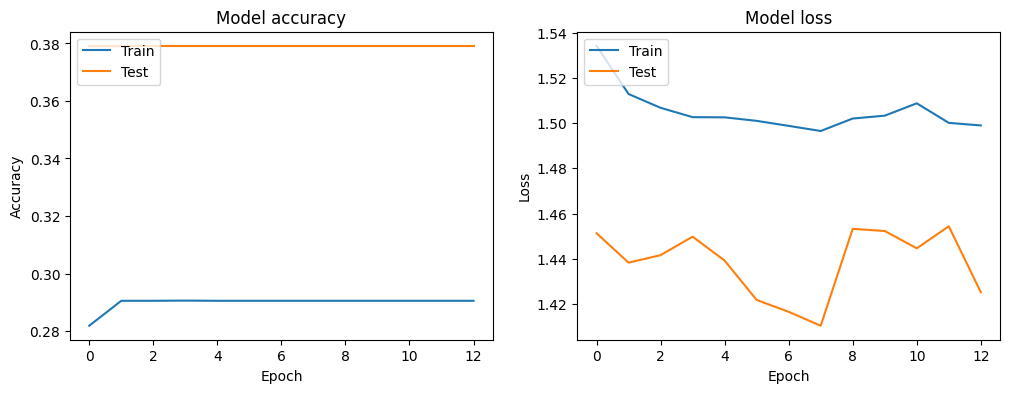

In [29]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 1004s 2s/step


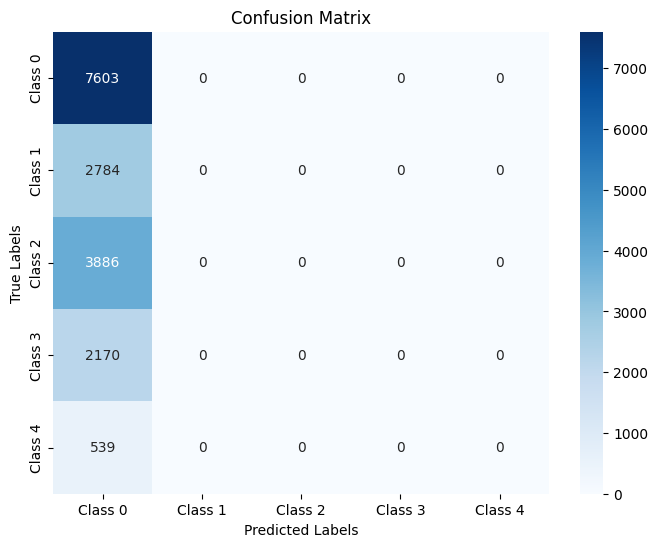

In [30]:
# Confusion matrix and predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()